# Prueba de FFT en audio

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import os
import os.path as path
from IPython.display import Audio
import librosa.display

%matplotlib inline

## Variables de Entorno
Estas tal vez irían mejor en un archivo de configuración?

In [134]:
INPUT_DIR = os.path.join(os.getcwd(), "input")

In [135]:
train_dir = path.join(INPUT_DIR, "audio_train")
train_files = [os.path.abspath(os.path.join(train_dir, file)) 
               for file in os.listdir(train_dir)]

In [460]:
class Sound:
    def __init__(self, fs = 44100, y = np.array([]), filename = None):
        self.filename = filename
        self.fs = fs
        self.y = self.y = np.array(y, float) # Para que librosa no se queje al graficar, a matplotlib le da igual
    
    def read_file(self):
        if filename is None:
            print("No hay un nombre de archivo definido para este sonido")
            return
        
        self.fs, self.y = wavfile.read(self.filename)
        self.y = np.array(self.y, float)
        
    def compute_ft(self):
        self.fty = np.fft.fft(self.y)
        
    def compute_spectrogram(self):
        self.f, self.t, self.sxx = spectrogram(self.y, self.fs, nperseg=300, noverlap=0)
        
    def play(self, how = "file"):
        if how == "file":
            audio = Audio(filename = self.filename, autoplay = True)
        elif how == "data":
            audio = Audio(data = self.y, rate = self.fs)
        else:
            print("Método de reproducción desconocido. Pruebe con 'file' o 'data'")
            audio = None
        
        return(audio)
    
    def plot_wave(self):
        plt.plot(self.y)
        
    def plot_ft(self):
        if not(hasattr(self, "fty")):
            self.compute_ft()

        frecs = np.linspace(0, 2*self.fs, len(self.y))
        plt.plot(frecs, abs(self.fty))
        plt.xlim(0,self.fs)
    
    def plot_spectrogram(self):
        if not(hasattr(self, "sxx")):
            self.compute_spectrogram()
            
        plt.imshow(np.log(self.sxx),
                   extent=(t[0], t[-1], f[0], f[-1]),
                   aspect=0.00011,
                   origin='lower',
                   interpolation=None)
        
    def plot_spectrogram_librosa(self):
        # Let's make and display a mel-scaled power (energy-squared) spectrogram
        S = librosa.feature.melspectrogram(self.y, sr=self.fs, n_mels=128)

        # Convert to log scale (dB). We'll use the peak power (max) as reference.
        log_S = librosa.power_to_db(S, ref=np.max)

        # Make a new figure
        plt.figure(figsize=(12,4))

        # Display the spectrogram on a mel scale
        # sample rate and hop length parameters are used to render the time axis
        librosa.display.specshow(log_S, sr=self.fs, x_axis='time', y_axis='mel')

        # Put a descriptive title on the plot
        plt.title('mel power spectrogram')

        # draw a color bar
        plt.colorbar(format='%+02.0f dB')

        # Make the figure layout compact
        plt.tight_layout()
        
    
    def split_harmonic_percussive(self):
        self.y_harmonic, self.y_percussive = librosa.effects.hpss(self.y)
        
        harmonic_sound = Sound(self.fs, self.y_harmonic)
        percussive_sound = Sound(self.fs, self.y_percussive)
        return harmonic_sound, percussive_sound

In [287]:
def nuevo_sonido(i = None):
    i = i if isinstance(i, int) else np.random.randint(0, len(train_files))
    archivo = train_files[i]
    fs, y = wavfile.read(archivo)
    sound = Sound(fs, y, archivo)
    return(sound)

In [351]:
s = nuevo_sonido()

In [352]:
s.play()

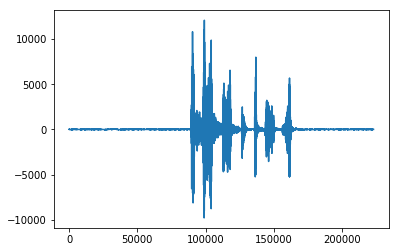

In [353]:
s.plot_wave()

In [354]:
s.compute_ft()

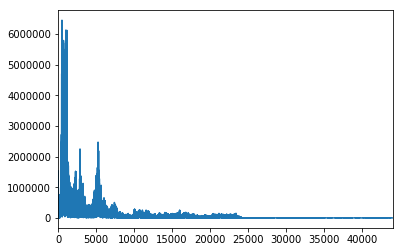

In [355]:
s.plot_ft()

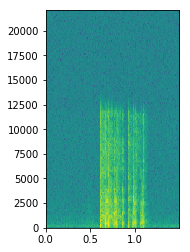

In [356]:
s.plot_spectrogram()

### Librosa
https://github.com/librosa/librosa

In [427]:
s.plot_spectrogram_librosa()

AttributeError: 'Sound' object has no attribute 'plot_spectrogram_librosa'

In [358]:
s_harmonico, s_percusivo = s.split_harmonic_percussive()

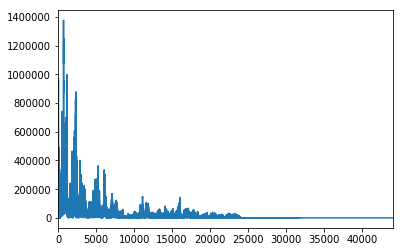

In [359]:
s_harmonico.plot_ft()

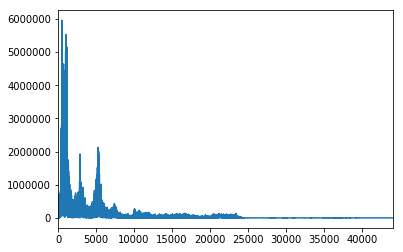

In [360]:
s_percusivo.plot_ft()

In [361]:
s_percusivo.play("data")

In [362]:
s_harmonico.play("data")

In [428]:
s_percusivo.plot_spectrogram_librosa()


AttributeError: 'Sound' object has no attribute 'plot_spectrogram_librosa'

In [429]:
s_harmonico.plot_spectrogram_librosa()

AttributeError: 'Sound' object has no attribute 'plot_spectrogram_librosa'

In [401]:
df = pd.read_csv("input/train.csv")

In [435]:
df["filename"] = [os.path.join(train_dir, f) for f in df.fname]

In [473]:
def sample_label(df, label, n):
    sample = df[df.label == label].sample(n)

    for filename in sample.filename.get_values():
        print(filename)
        sound = Sound(filename = filename)
        sound.read_file()
        sound_h, sound_p = sound.split_harmonic_percussive()
#        sound.plot_spectrogram()
#        sound_h.plot_spectrogram_librosa()
        [x.plot_spectrogram_librosa() for x in [sound, sound_h, sound_p]]

/home/gonzalo/kaggle/fschallenge/input/audio_train/ecc5cde3.wav
/home/gonzalo/kaggle/fschallenge/input/audio_train/26928361.wav


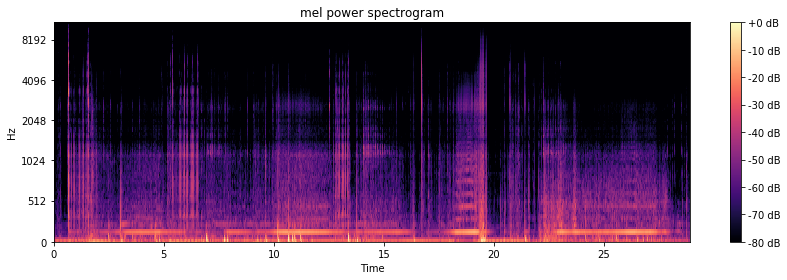

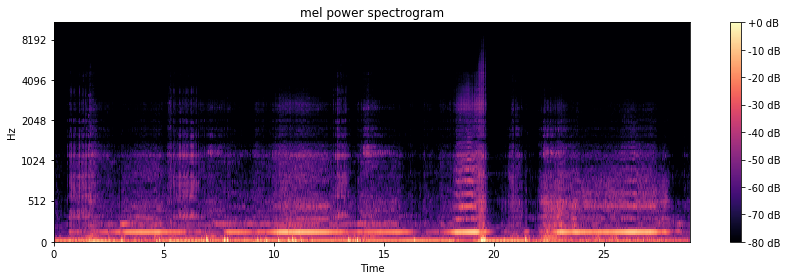

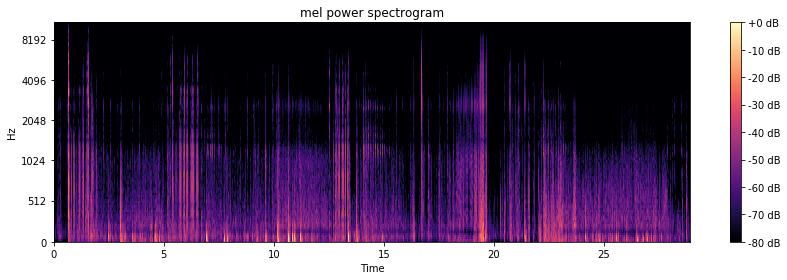

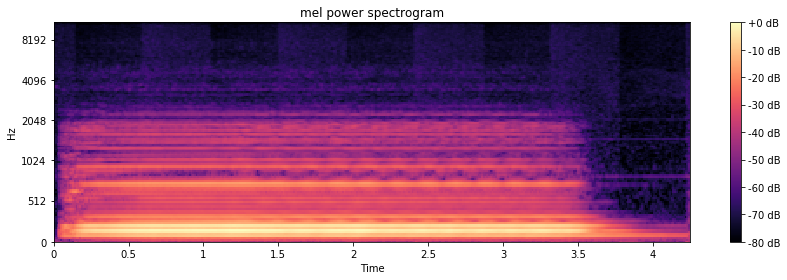

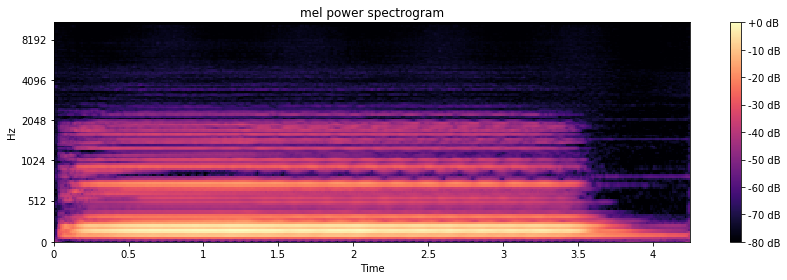

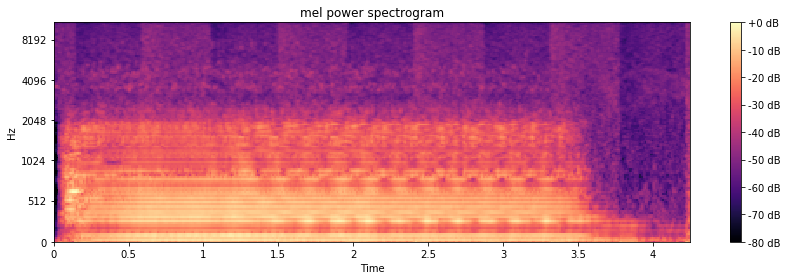

In [475]:
sample_label(df, "Cello", 2)